In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [7]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [10]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
feature=['sex','smoker','region']
for i in feature:
  df[i]=lab.fit_transform(df[i])

In [11]:
x=df.iloc[:,:-1]
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [12]:
y=df.iloc[:,-1]
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


<Axes: xlabel='age', ylabel='charges'>

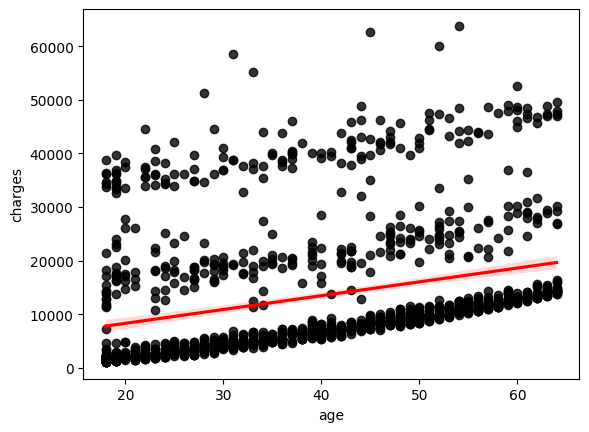

In [13]:
import seaborn as snc
snc.regplot(x=df['age'],y=y,color='k',line_kws={'color':'r'})

<Axes: xlabel='bmi', ylabel='charges'>

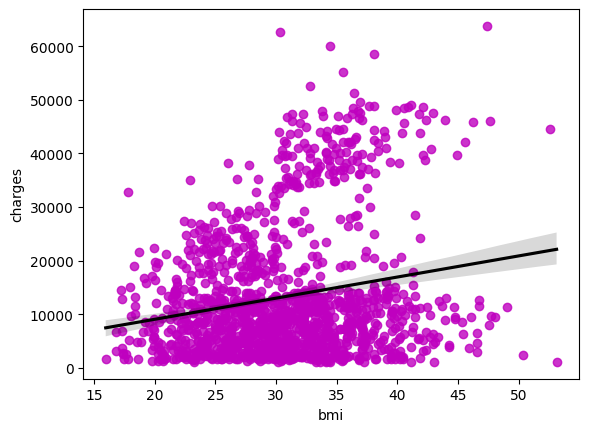

In [14]:
snc.regplot(x=df['bmi'],y=y,color='m',line_kws={'color':'k'})

<Axes: xlabel='children', ylabel='charges'>

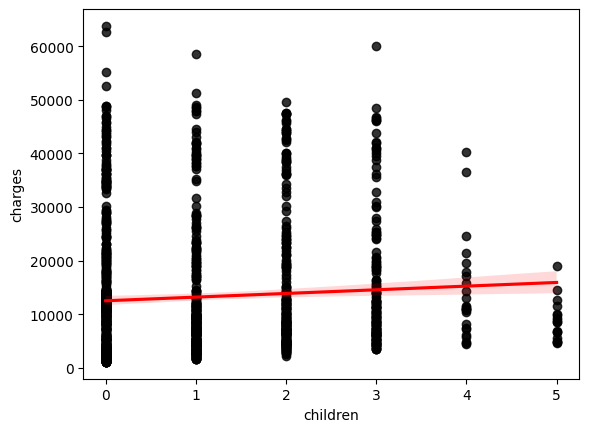

In [16]:
snc.regplot(x=df['children'],y=y,color='k',line_kws={'color':'r'})

<Axes: xlabel='sex', ylabel='charges'>

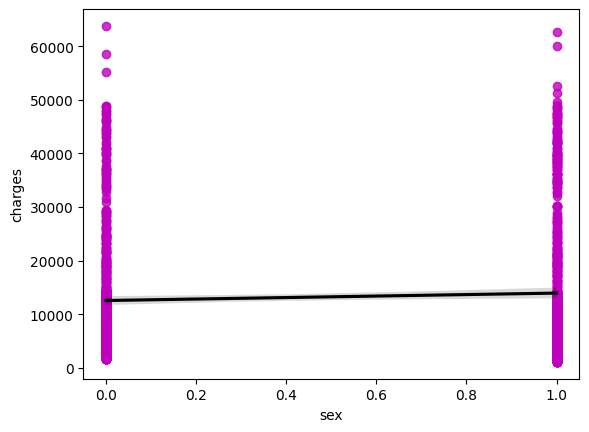

In [17]:
snc.regplot(x=df['sex'],y=y,color='m',line_kws={'color':'k'})

<Axes: xlabel='smoker', ylabel='charges'>

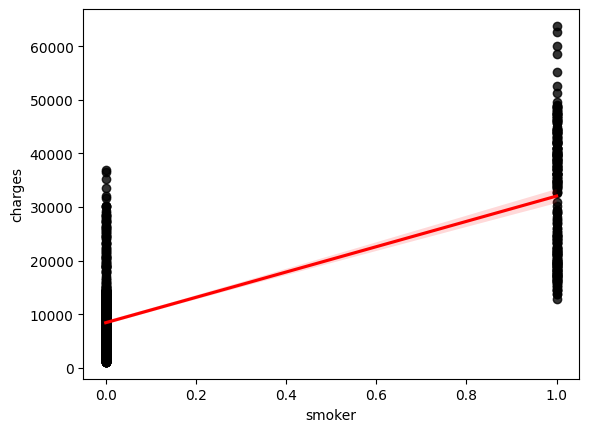

In [18]:
snc.regplot(x=df['smoker'],y=y,color='k',line_kws={'color':'r'})

<Axes: xlabel='region', ylabel='charges'>

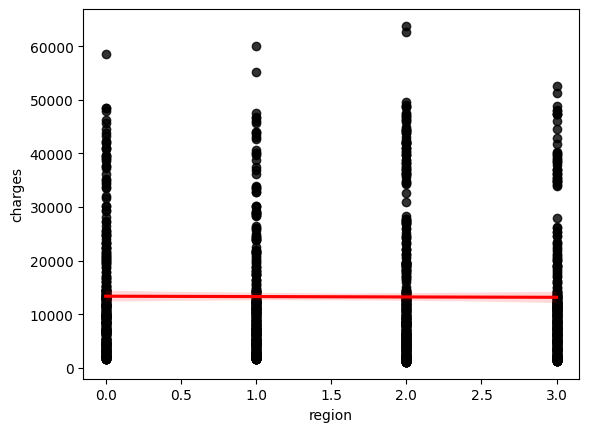

In [19]:
snc.regplot(x=df['region'],y=y,color='k',line_kws={'color':'r'})

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ 8.93142116e+03,  7.07090670e+03,  3.69370805e+04,  9.59699214e+03,
        2.70083549e+04,  1.08664849e+04,  3.74610217e+01,  1.72228092e+04,
        9.18308115e+02,  1.13965537e+04,  2.79154456e+04,  9.53381323e+03,
        5.18928014e+03,  3.86124990e+04,  4.05094490e+04,  3.72748566e+04,
        1.53562559e+04,  3.59449407e+04,  9.10631783e+03,  3.14429410e+04,
        3.66298253e+03,  1.00966745e+04,  2.21091896e+03,  7.10598084e+03,
        1.13521417e+04,  1.30231210e+04,  1.44472857e+04,  6.12031303e+03,
        9.94564893e+03,  2.18617424e+03,  8.91389260e+03,  1.31869496e+04,
        4.49110116e+03,  3.30469662e+03,  4.32885102e+03,  1.32330189e+04,
        1.67071398e+03,  8.63238607e+03,  3.32727214e+04,  3.26840062e+04,
        3.60294190e+03,  4.40040903e+03,  1.40663345e+04,  1.16268203e+04,
        8.89219642e+03,  1.21011367e+04,  5.23906853e+03,  2.84241293e+03,
        3.56294259e+04,  9.27854339e+03,  1.59720792e+04,  2.34524488e+03,
        1.24695907e+04,  

In [24]:
df1=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})
df1

,Actual_value,Predicted_value,Difference
764,9095.06825,8931.421164,163.647086
887,5272.17580,7070.906703,-1798.730903
890,29330.98315,36937.080496,-7606.097346
1293,9301.89355,9596.992144,-295.098594
259,33750.29180,27008.354871,6741.936929
...,...,...,...
701,9541.69555,16133.551618,-6591.856068
672,4399.73100,6743.836928,-2344.105928
1163,2200.83085,2066.203492,134.627358
1103,11363.28320,14697.798124,-3334.514924


In [25]:
print(list(zip(x,model.coef_)))

[('age', 261.62568984274697), ('sex', 109.64719595060507), ('bmi', 344.5448306560361), ('children', 424.3701659576309), ('smoker', 23620.802521481746), ('region', -326.4626252721918)]


In [26]:
print('y intercept = ',model.intercept_)

y intercept =  -12364.391322279254


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,r2_score
